In [ ]:
import numpy as np
import pandas as pd

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

#For Visualising the data
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/Used Car Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [ ]:
df.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [ ]:
df.isnull().sum()

Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [ ]:
df = df.drop(['car_name',df.columns[0]], axis=1)

In [ ]:
df['registration_year'] = pd.to_datetime(df['registration_year'], format='%b-%y', errors='coerce')

df['buy_year'] = df['registration_year'].dt.year
df['buy_year'] = df['buy_year'].fillna(df['registration_year'].dt.year)

df = df.drop(columns=['registration_year'])
df = df.dropna()

In [ ]:
df['age'] =  2024- df['buy_year']
df = df.drop(['buy_year'],axis=1)

In [ ]:
df = df.drop(['manufacturing_year','transmission','engine(cc)','max_power(bhp)','insurance_validity'],axis=1)

In [ ]:
df.columns

Index(['fuel_type', 'seats', 'kms_driven', 'ownsership', 'mileage(kmpl)',
       'torque(Nm)', 'price(in lakhs)', 'age'],
      dtype='object')

In [ ]:
valid= ['Petrol', 'Diesel', 'CNG']
df = df[df['fuel_type'].isin(valid)]
df["fuel_type"] = pd.factorize(df["fuel_type"])[0]

In [ ]:
valid = ['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner']
df = df[df['ownsership'].isin(valid)]
df["ownsership"] = pd.factorize(df["ownsership"])[0]

In [ ]:
df = df[df['kms_driven'] < df['kms_driven'].quantile(0.9)]
df = df[df['mileage(kmpl)'] < df['mileage(kmpl)'].quantile(0.9)]
df = df[df['torque(Nm)'] < df['torque(Nm)'].quantile(0.9)]
df = df[df['price(in lakhs)'] < df['price(in lakhs)'].quantile(0.99)]

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,fuel_type,seats,kms_driven,ownsership,mileage(kmpl),torque(Nm),price(in lakhs),age
1,0,5,30615,0,17.40,9863.0,8.99,3.0
2,1,5,24000,0,20.68,188.0,23.75,6.0
5,0,5,42000,0,18.70,887.0,5.45,7.0
6,0,5,36739,0,18.90,8186.0,5.12,5.0
9,0,5,28783,0,17.00,1085.0,8.02,5.0


In [ ]:
df.corr()['price(in lakhs)']

fuel_type          0.593928
seats              0.288055
kms_driven        -0.071804
ownsership        -0.013502
mileage(kmpl)     -0.321082
torque(Nm)        -0.101287
price(in lakhs)    1.000000
age               -0.331369
Name: price(in lakhs), dtype: float64

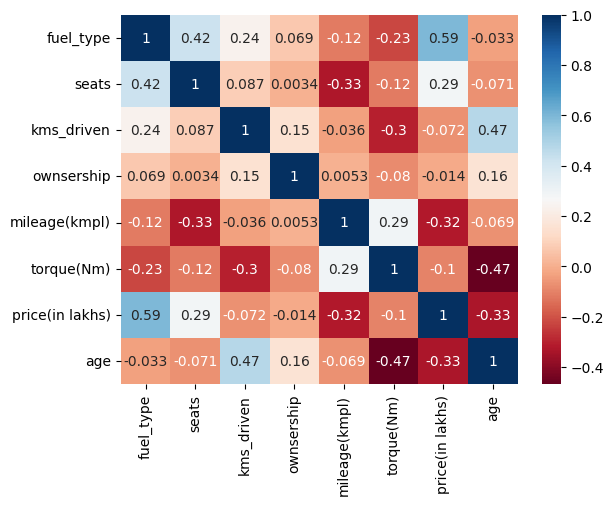

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.show()

In [ ]:
X = df.drop(["price(in lakhs)"], axis=1)
Y = df["price(in lakhs)"]

In [ ]:
print(X.shape, Y.shape)

(572, 7) (572,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(172, 7)
(400,)
(172,)


In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

print(x_train)

[[1.         0.33333333 0.95814286 ... 0.88116592 0.78452355 0.35714286]
 [0.         0.33333333 0.64285714 ... 0.55904335 0.08335153 0.42857143]
 [0.         0.33333333 0.81428571 ... 0.76158445 0.05816408 0.57142857]
 ...
 [0.         0.33333333 0.07142857 ... 0.93796712 0.59052195 0.14285714]
 [0.         0.33333333 0.58912857 ... 0.96562033 0.06136711 0.35714286]
 [0.         0.33333333 0.79022857 ... 0.62705531 0.00509573 0.21428571]]


In [ ]:
print(X.shape, x_train.shape, x_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(572, 7) (400, 7) (172, 7)
(572,) (400,) (172,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(7, activation='relu'))#I/P
#HIDDEN LAYERS
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))

model.add(Dense(1,activation='linear')) # O/P

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.fit(x_train, y_train, epochs= 400, validation_data=(x_test,y_test))

Epoch 1/400
13/13 [==============================] - 1s 20ms/step - loss: 58.7737 - val_loss: 36.6626
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 27.7812 - val_loss: 31.1459
Epoch 3/400
13/13 [==============================] - 0s 7ms/step - loss: 23.5834 - val_loss: 26.5464
Epoch 4/400
13/13 [==============================] - 0s 7ms/step - loss: 22.2163 - val_loss: 30.5501
Epoch 5/400
13/13 [==============================] - 0s 6ms/step - loss: 21.3539 - val_loss: 25.1446
Epoch 6/400
13/13 [==============================] - 0s 6ms/step - loss: 21.3873 - val_loss: 25.3557
Epoch 7/400
13/13 [==============================] - 0s 7ms/step - loss: 20.1317 - val_loss: 24.9158
Epoch 8/400
13/13 [==============================] - 0s 7ms/step - loss: 18.8861 - val_loss: 25.3122
Epoch 9/400
13/13 [==============================] - 0s 7ms/step - loss: 19.8302 - val_loss: 25.2034
Epoch 10/400
13/13 [==============================] - 0s 7ms/step - loss: 17.9915 - val_lo

In [ ]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 20.0210


20.021015167236328

In [ ]:
test_pred = model.predict(x_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: 0.46496835891203603


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

#Calculate metrics on the test set
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)
import math
print(f'Mean Squared Error on Test Set: {mse:.2f}')
print(f'Root Mean Squared Error on Test Set: {math.sqrt(mse):.2f}')
print(f'Mean Absolute Error on Test Set: {mae:.2f}')
print(f'R-squared on Test Set: {r2:.2f}')

Mean Squared Error on Test Set: 20.02
Root Mean Squared Error on Test Set: 4.47
Mean Absolute Error on Test Set: 2.82
R-squared on Test Set: 0.46


In [ ]:
count = 0
print("true_value : predicted_value \n")
for true_value, predicted_value in zip(y_test, test_pred):
    print(f'{true_value}:{predicted_value}')
    count += 1
    if count == 5:
        break


true_value : predicted_value 

3.9:[6.203575]
4.74:[6.002676]
5.45:[6.490859]
4.35:[4.7656713]
5.36:[6.144656]
